# Comparison of scipy Optimization Approaches for Rosenbrock (L-BFGS-B, BFGS, Newton-CG, CG)

In [1]:
import autograd.numpy as np
import autograd

import matplotlib.pyplot as plt

import scipy.optimize

In [2]:
import os
os.getcwd()
os.chdir("/c/Users/thsiao3/Documents/emory_class/MATH789/hw4")

import utils

2-norm

\begin{gather}
E(\textbf{C}_{\text{obs}}, \textbf{W})=\Vert \textbf{WY} - \textbf{C}_{\text{obs}} \Vert^2
\end{gather}

Cross entropy

\begin{gather}
E(\textbf{C}_{\text{obs}}, \textbf{W})=-\frac{1}{n}\textbf{e}^\top_{n_c}(\textbf{C}_{\text{obs}} \odot \textbf{WY}) \textbf{e}_n + 
\frac{1}{n}\log(\textbf{e}^\top_{n_c}\exp(\textbf{WY}))\textbf{e}_n
\end{gather}

In [4]:
x0 = np.array([-4., 5.])

Rosenbrock Function

In [8]:
def f(X):
    return (1 - X[0])**2 + 100 * (X[1] - X[0]**2)**2
jac = autograd.grad(f)


XallBFGS= utils.scipyOptMinWrapper(fun=f, x0=x0, jac=jac, method="BFGS")['Xall']
XallLBFGS= utils.scipyOptMinWrapper(fun=f, x0=x0, jac=jac, method="L-BFGS-B")['Xall']
XallNCG= utils.scipyOptMinWrapper(fun=f, x0=x0, jac=jac, method="Newton-CG")['Xall']
XallCG= utils.scipyOptMinWrapper(fun=f, x0=x0, jac=jac, method="CG")['Xall']

In [11]:
# Model Preds grid
xmin=-5; xmax=5
ymin=-2; ymax=10
x = np.arange(xmin, xmax,.05)
y = np.arange(ymin, ymax,.05)[::-1]
X, Y = np.meshgrid(x,y)
Z = np.stack((X, Y), axis=0)

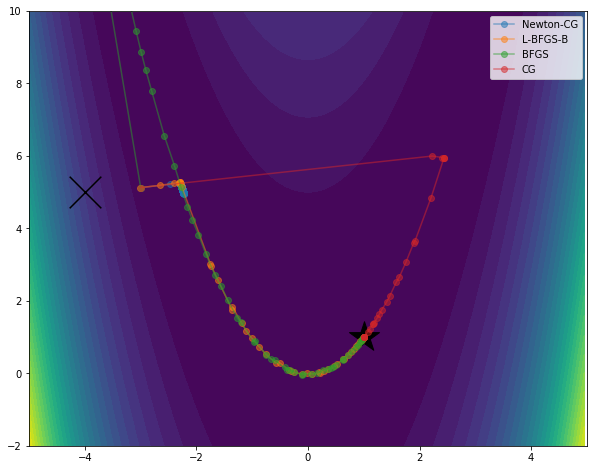

In [13]:
plt.figure(figsize=(10,8))
output = f(Z)
plt.contourf(X, Y, output, 30)
plt.plot(XallNCG[0], XallNCG[1], marker='o', alpha = .5, label='Newton-CG')
plt.plot(XallLBFGS[0], XallLBFGS[1], marker='o', alpha = .5, label='L-BFGS-B')
plt.plot(XallBFGS[0], XallBFGS[1], marker='o', alpha = .5, label='BFGS')
plt.plot(XallCG[0], XallCG[1], marker='o', alpha = .5, label='CG')
plt.scatter(1, 1, s=1000, marker='*', c='black')
plt.scatter(x0[0], x0[1], s=1000, marker='x', c='black')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()